<a href="https://colab.research.google.com/github/SampreethAvvari/datasciencebootcamp/blob/main/Week4_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 4 : Data Visualization

*Author: Kartik Jindgar*
*Submitted by: Sampreeth Avvari*

---



In this guided practice lab you will use Pandas, Matplotlib, and Seaborn to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and how to manipulate the style of your plots with Matplotlib.

## Introduction

In this lab, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

Toward the end of the lab, we will show some motivational plots using Seaborn, a popular statistics plotting library, as well as go more in-depth about how Matplotlib works.

### Pandas Plotting Documentation

[Link to Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)


In [4]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Creating dummy data for examples

In [5]:
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

Loading other datasets that will be used in this notebook

In [6]:
# Read in the Boston housing data.
housing_csv = '/content/boston_housing_data.csv'
housing = pd.read_csv(housing_csv)

# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = '/content/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

# Read in the ufo data.
ufo = pd.read_csv('/content/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

## Line plots: Show the trend of a numerical variable over time

In [7]:
# Count the number of ufo reports each year (and sort by year).
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

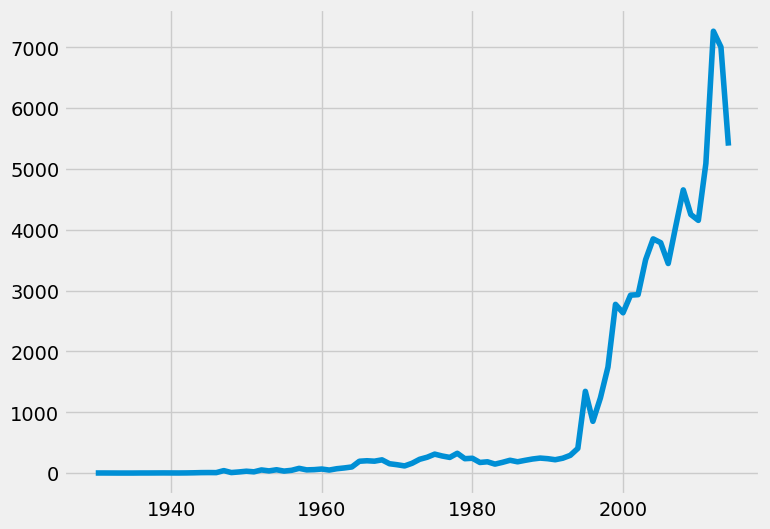

In [8]:
# Compare with line plot -- UFO sightings by year. (Ordering by year makes sense.)
ufo.Year.value_counts().sort_index().plot();

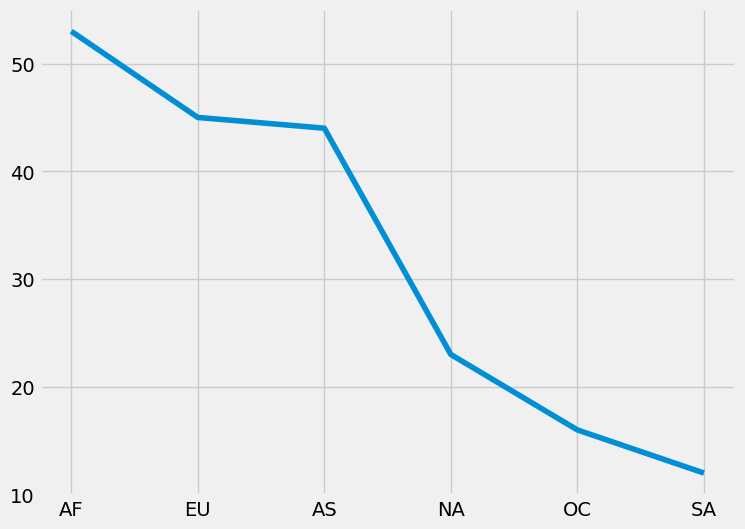

In [9]:
# COMMON MISTAKE: Don't use a line plot when the x-axis cannot be ordered sensically!

# For example, ordering by continent below shows a trend where no exists ...
#    it would be just as valid to plot the continents in any order.

# So, a line plot is the wrong type of plot for this data.
# Always think about what you're plotting and if it makes sense.

drinks.continent.value_counts().plot();

Line Plot with dummy data

<Axes: >

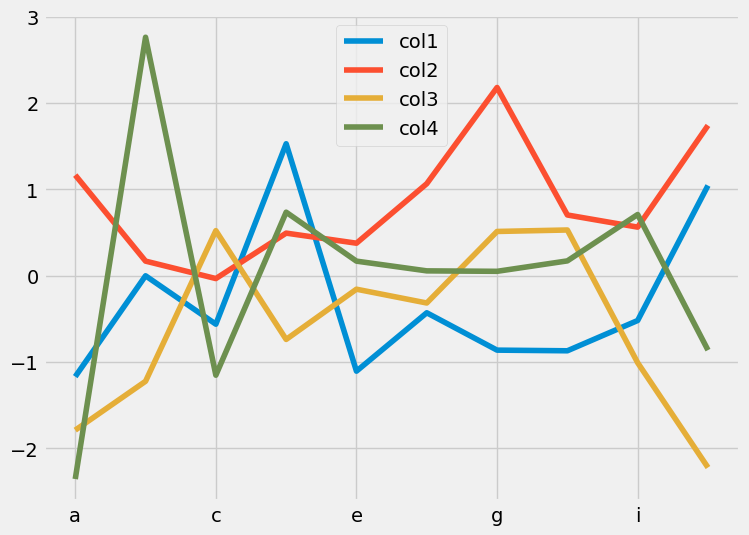

In [10]:
df.plot()

How to change the size of a plot

<Axes: >

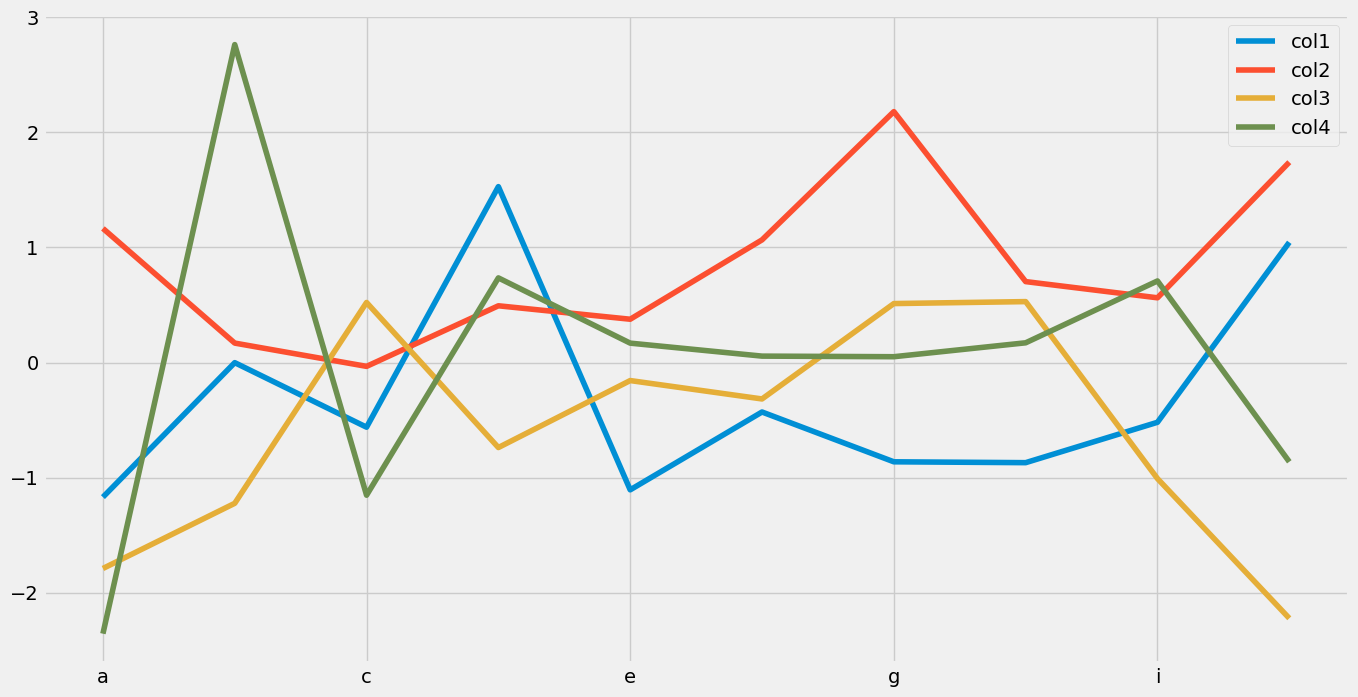

In [11]:
df.plot(figsize=(15,8)) #(width, height)

How to change the color of a plot


Useful [link](https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.plot.line.html) to understand the different possible ways you can set color values for different columns of the dataframe

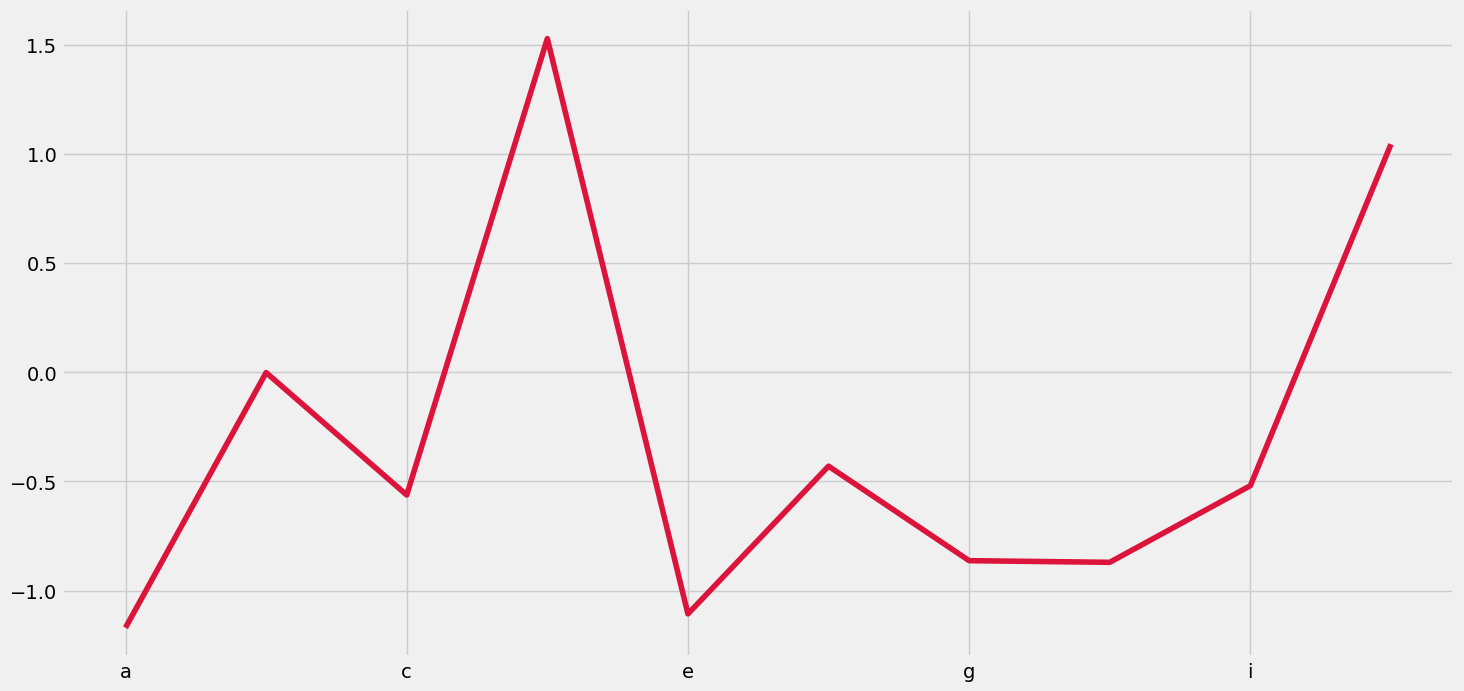

In [12]:
df['col1'].plot(color='crimson', figsize=(16,8));

How to change the style of individual plots

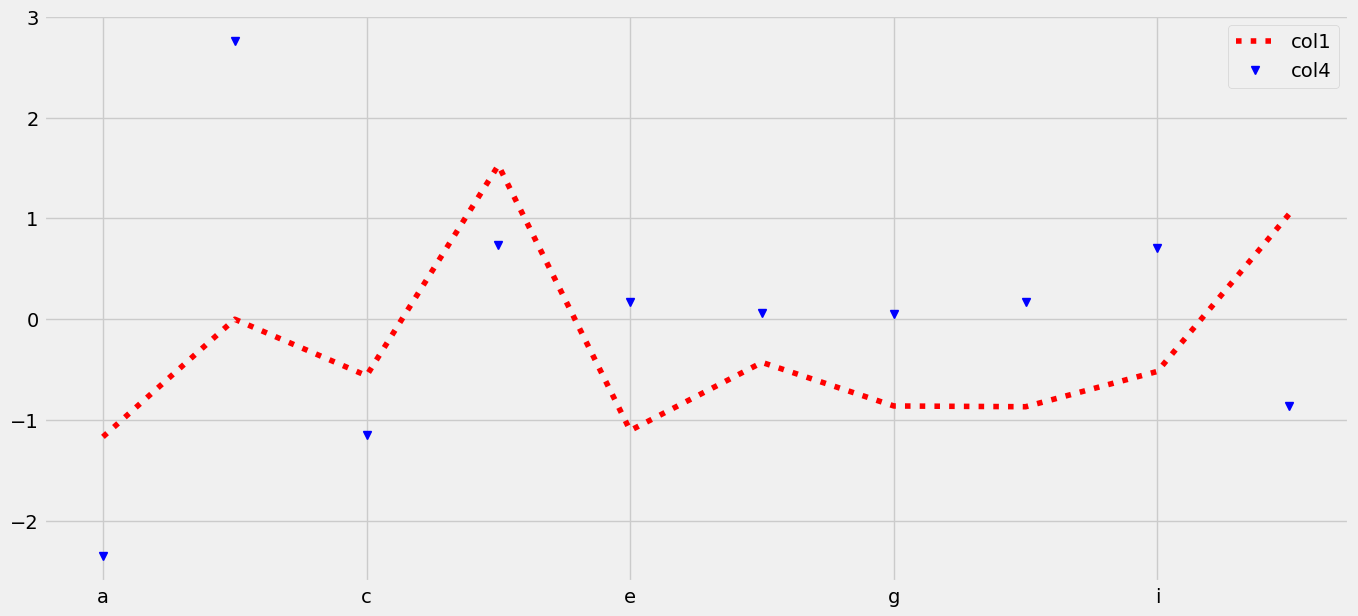

In [13]:
# : - dotted line, v - triangle_down
# r - red, b - blue
df[['col1', 'col4']].plot(figsize=(15,7), style={'col1': ':r', 'col4': 'vb'});

Practice problem

Create a line plot of ZN and INDUS in the housing data.
- For ZN, use a solid green line. For INDUS, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

## Bar Plots: Show a numerical comparison across different categories

In [14]:
# Count the number of countries in each continent.
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    193 non-null    object 
 1   beer       193 non-null    int64  
 2   spirit     193 non-null    int64  
 3   wine       193 non-null    int64  
 4   liters     193 non-null    float64
 5   continent  193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [15]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

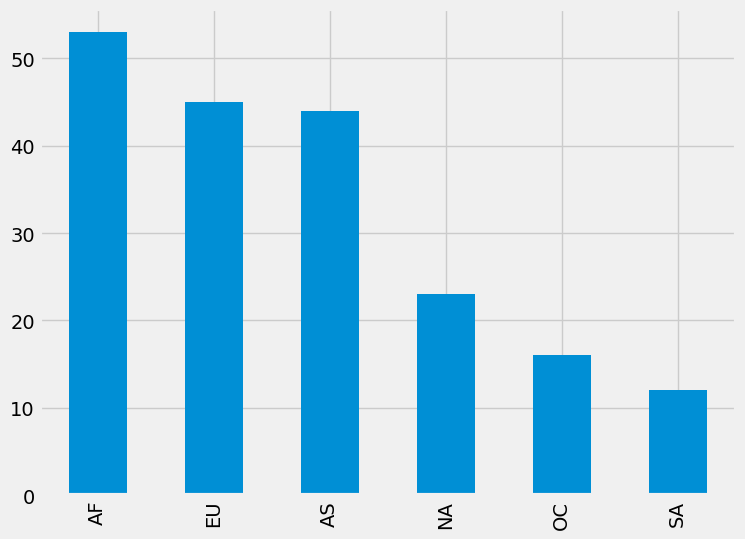

In [16]:
# Compare with bar plot.
drinks.continent.value_counts().plot(kind='bar');

In [ ]:
# Calculate the mean alcohol amounts for each continent.

In [17]:
drinks.groupby('continent').mean()

<ipython-input-17-031c103ddf69>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drinks.groupby('continent').mean()


beer      spirit        wine    liters
continent                                              
AF          61.471698   16.339623   16.264151  3.007547
AS          37.045455   60.840909    9.068182  2.170455
EU         193.777778  132.555556  142.222222  8.617778
NA         145.434783  165.739130   24.521739  5.995652
OC          89.687500   58.437500   35.625000  3.381250
SA         175.083333  114.750000   62.416667  6.308333

In [18]:
# Side-by-side bar plots
drinks.groupby('continent').mean().plot;

<ipython-input-18-d84f9c6006a3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drinks.groupby('continent').mean().plot;


<ipython-input-19-cd1f91c7c9bc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drinks.groupby('continent').mean().sort_values('beer').plot(kind='bar');


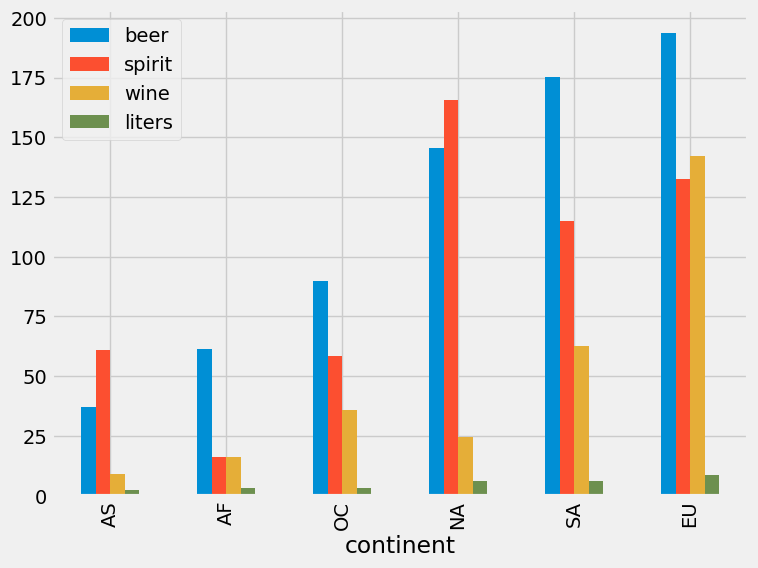

In [19]:
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().sort_values('beer').plot(kind='bar');

<ipython-input-20-0ba5414dc3ab>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True);


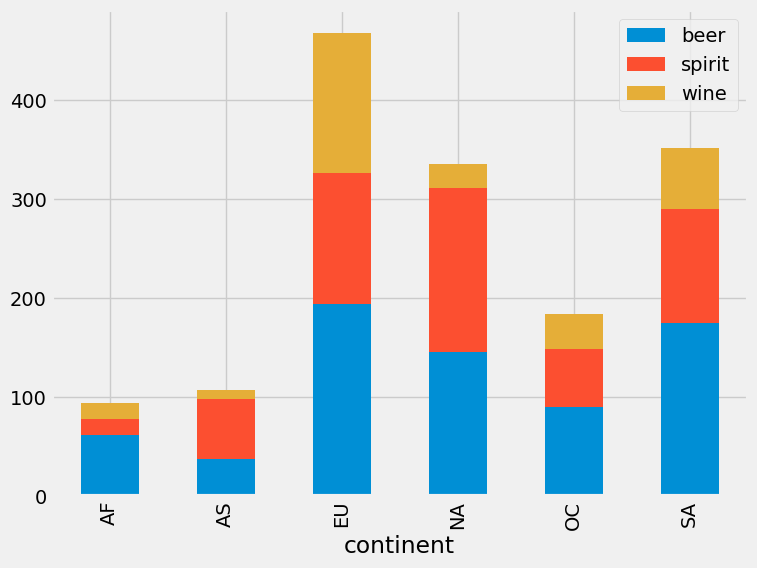

In [20]:
# Stacked bar plot (with the liters comparison removed!)
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True);

Using a `DataFrame` and Matplotlib commands, we can get fancy.

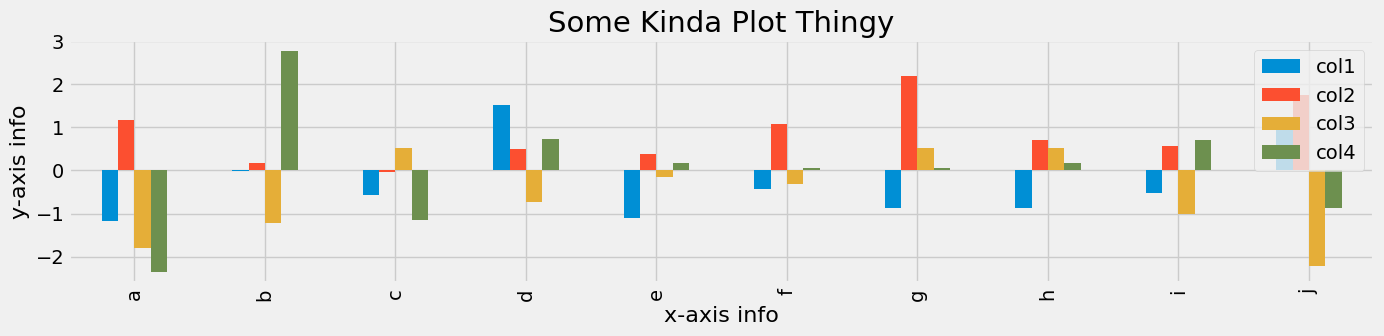

In [21]:
ax = df.plot(kind='bar', figsize=(15,3));

# Set the title.
ax.set_title('Some Kinda Plot Thingy', fontsize=21,y=1);

# Move the legend.
ax.legend(loc=1);

# x-axis labels
ax.set_ylabel('y-axis info', fontsize=16);

# y-axis labels
ax.set_xlabel('x-axis info', fontsize=16);

Practice Problem

Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing.
- Move the legend to the lower-left corner.
- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

## Histograms : Show the distribution of a numerical variable

In [22]:
# Sort the beer column and mentally split it into three groups.
drinks.beer.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

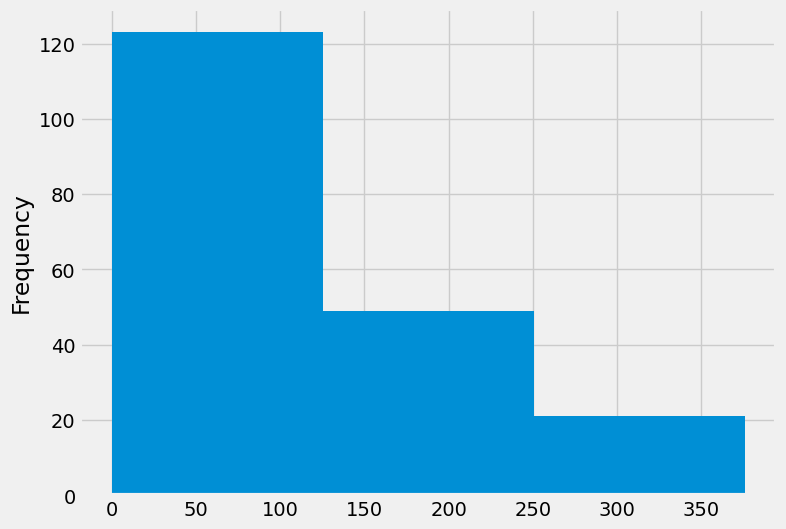

In [23]:
# Compare the above with histogram.
# About how many of the points above are in the groups 1-125, 125-250, and 250-376?
drinks.beer.plot(kind='hist', bins=3);

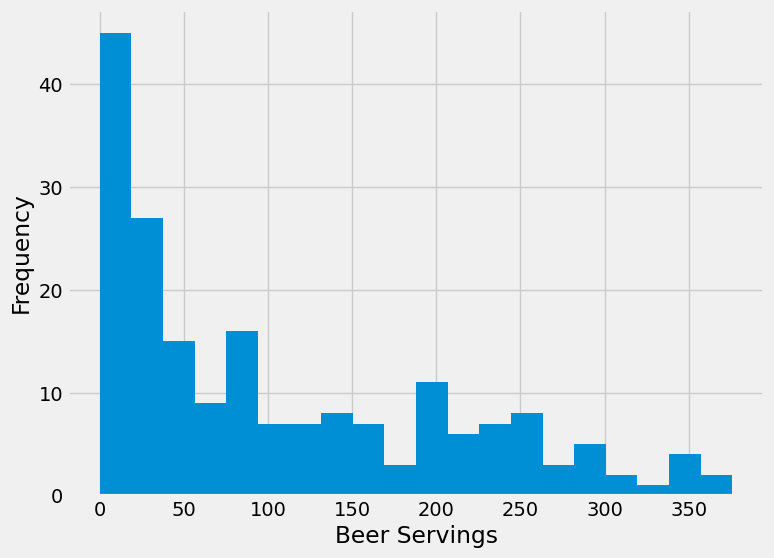

In [24]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.
drinks.beer.plot(kind='hist', bins=20);
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');

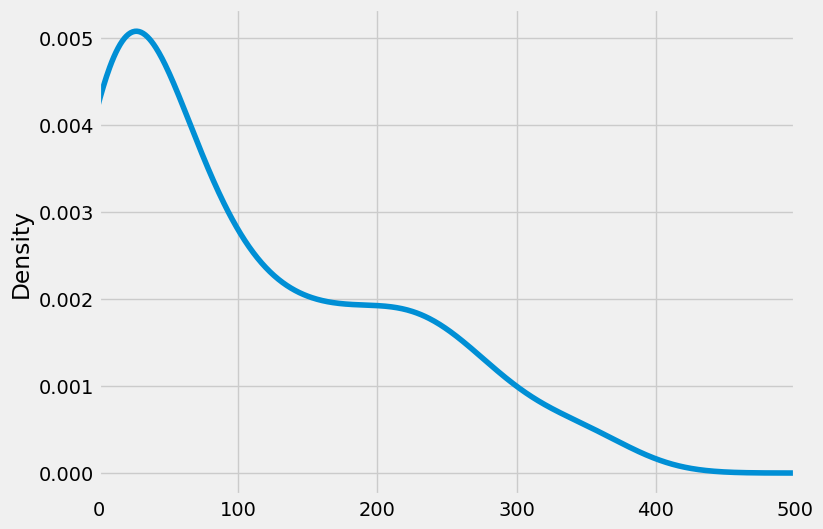

In [25]:
# Compare with density plot (smooth version of a histogram).
drinks.beer.plot(kind='density', xlim=(0, 500));

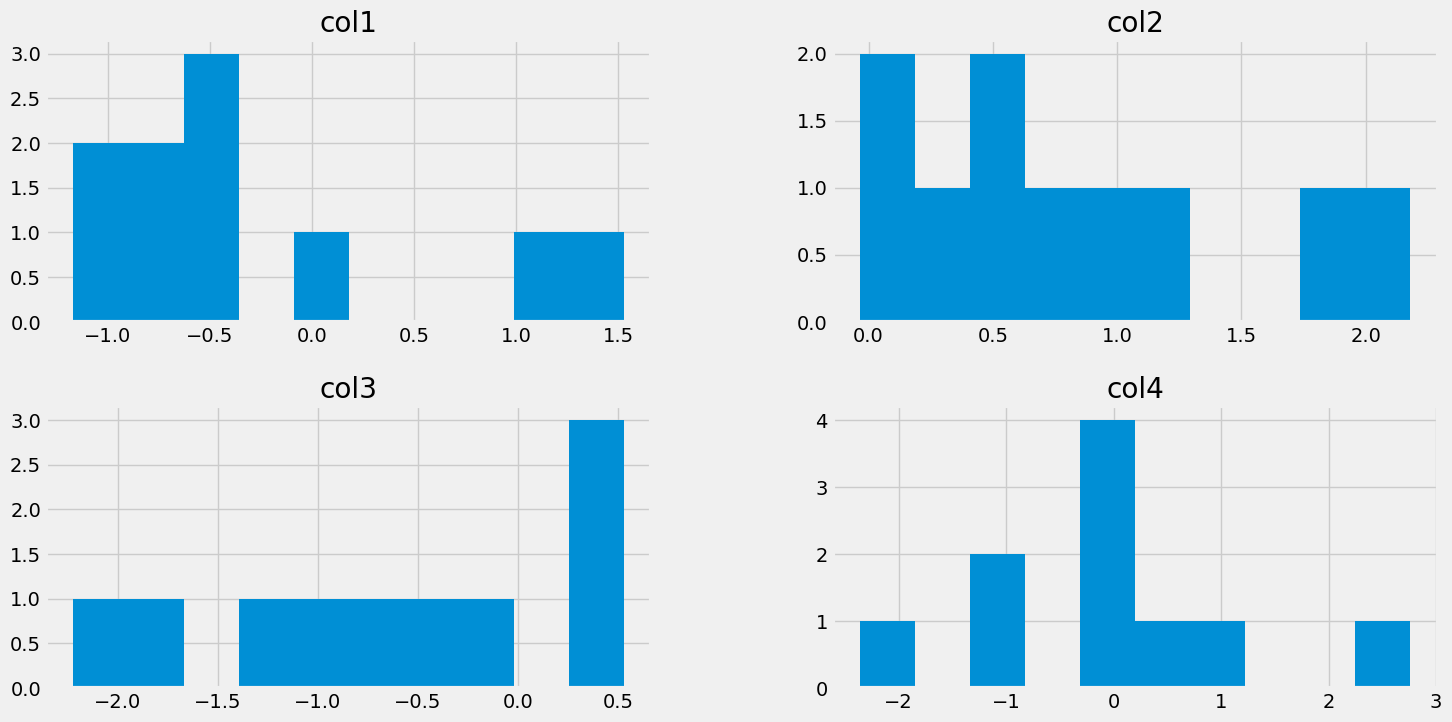

In [26]:
# Making histograms of DataFrames — histogram of random data
df.hist(figsize=(16,8));

Single **Histogram**

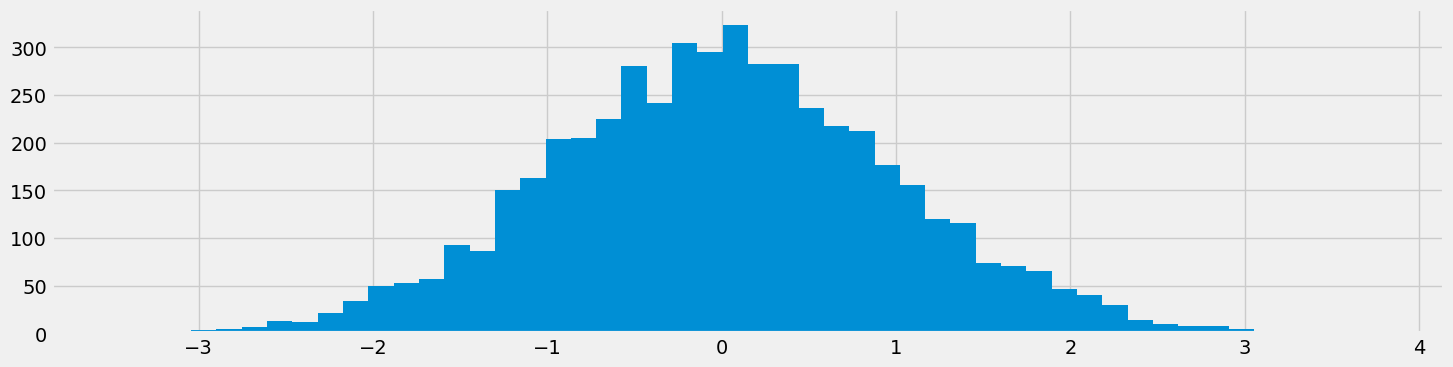

In [27]:
norm = np.random.standard_normal(5000)
pd.Series(norm).hist(figsize=(16,4), bins=50);

<Axes: >

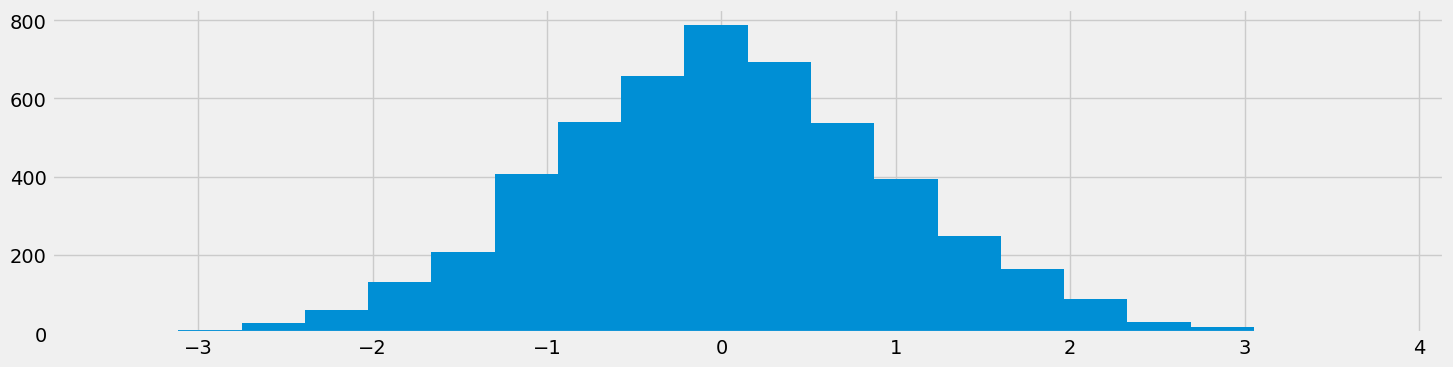

In [28]:
pd.Series(norm).hist(figsize=(16,4), bins=20)

Practice Problem

Create a histogram with pandas for using MEDV in the housing data.
- Set the bins to 20

## Grouped Histograms: Show one histogram for each group

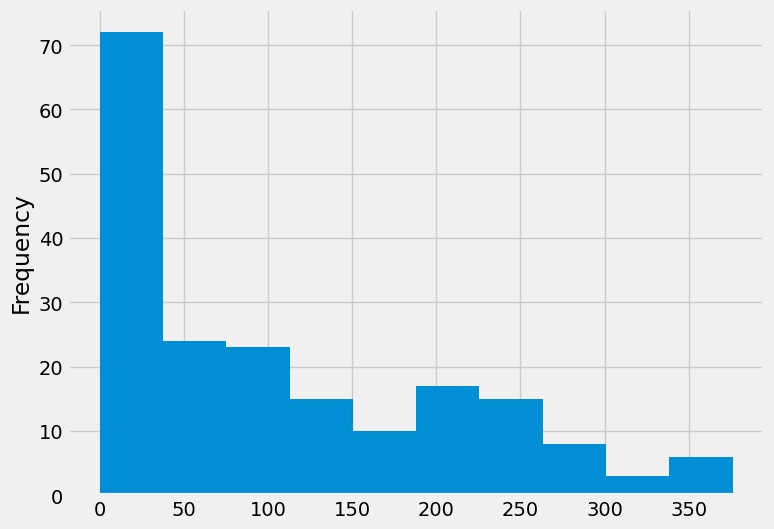

In [29]:
# Reminder: Overall histogram of beer servings
drinks.beer.plot(kind='hist');

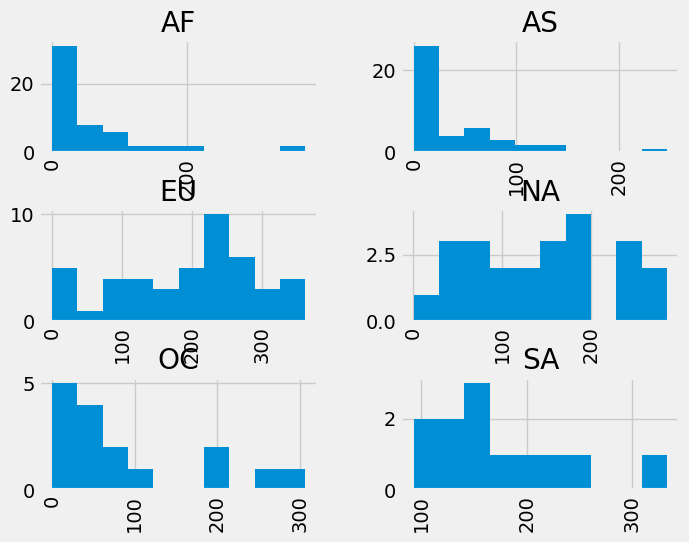

In [30]:
# Histogram of beer servings grouped by continent -- how might these graphs be misleading?
drinks.hist(column='beer', by='continent');

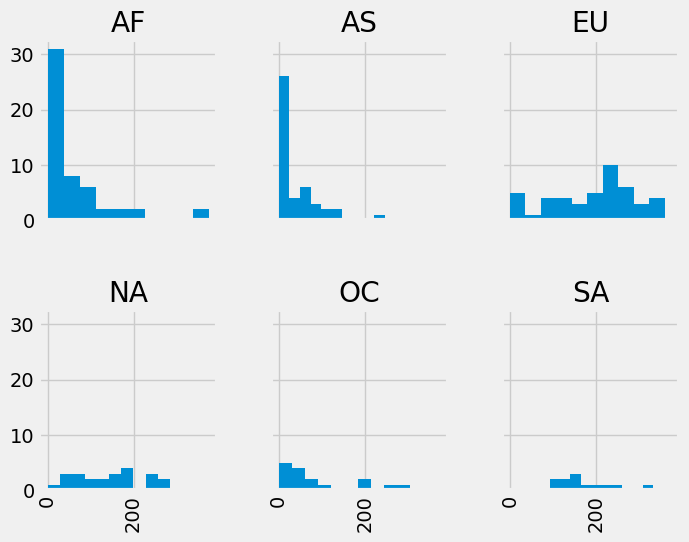

In [31]:
# Share the x- and y-axes.
drinks.hist(column='beer', by='continent', sharex=True, sharey=True, layout=(2, 3));

## Box Plots: Show quartiles (and outliers) for one or more numerical variables

---

We can use boxplots to quickly summarize distributions.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

<Axes: >

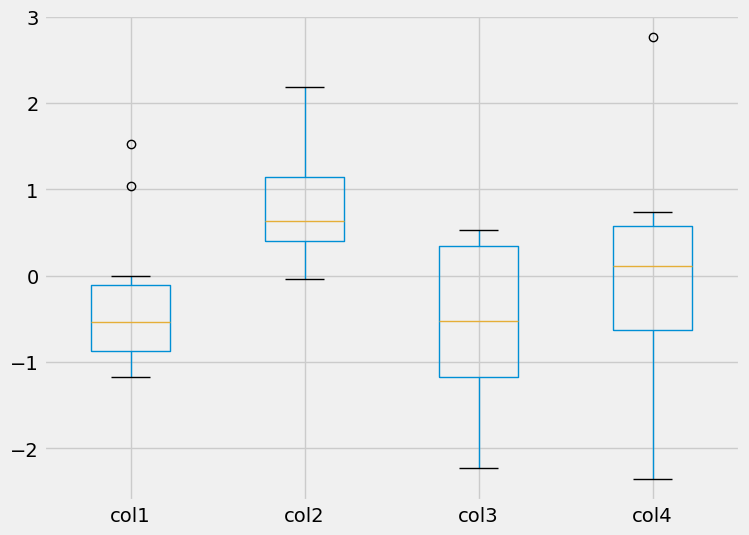

In [32]:
df.boxplot()

In [33]:
# Sort the spirit column.
drinks.spirit.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

In [34]:
# Show "five-number summary" for spirit.
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

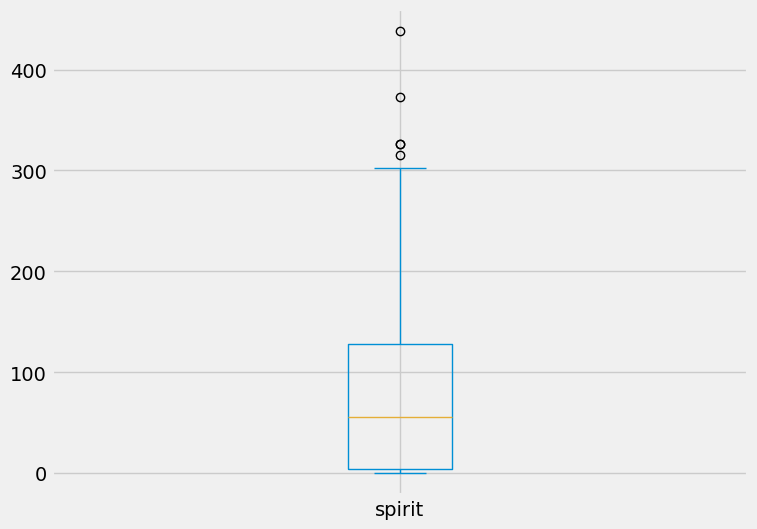

In [35]:
# Compare with box plot.
drinks.spirit.plot(kind='box');

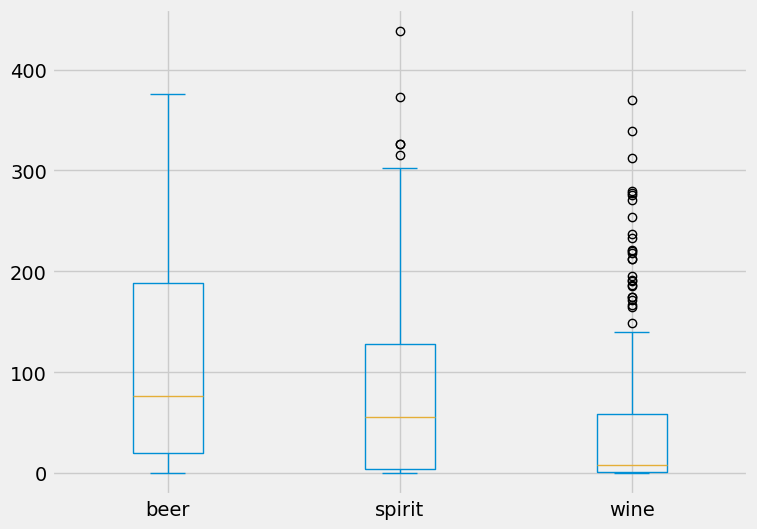

In [36]:
# Include multiple variables.
drinks.drop('liters', axis=1).plot(kind='box');

How to use a box plot to preview the distributions in the housing data

<Axes: >

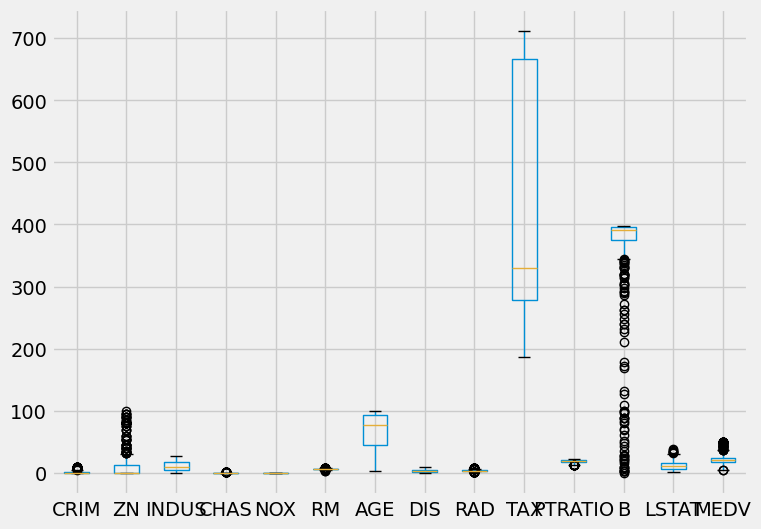

In [37]:
housing.boxplot()

## Grouped box plots: Show one box plot for each group

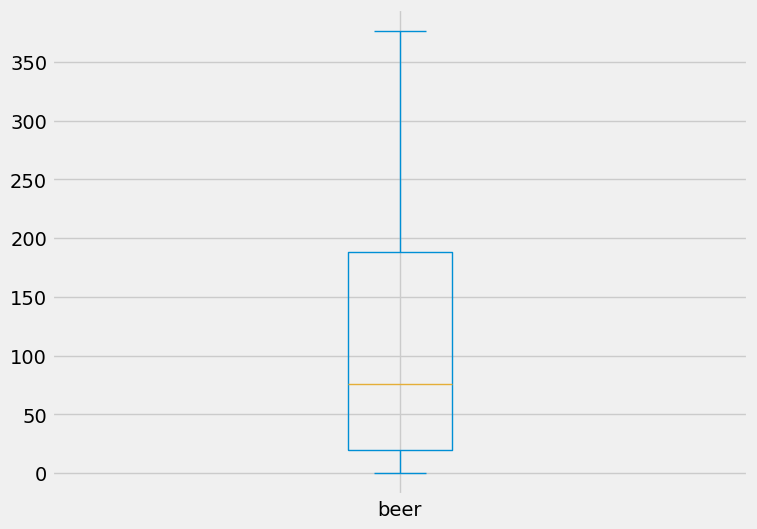

In [38]:
# Reminder: box plot of beer servings
drinks.beer.plot(kind='box');

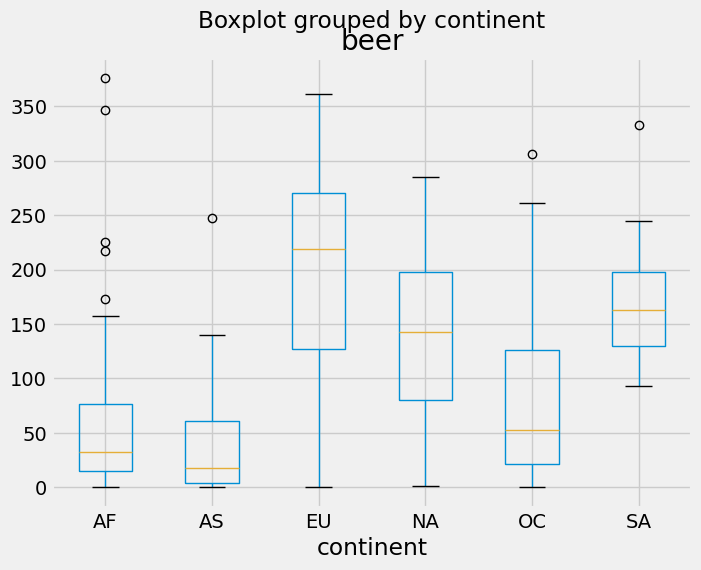

In [39]:
# Box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent');

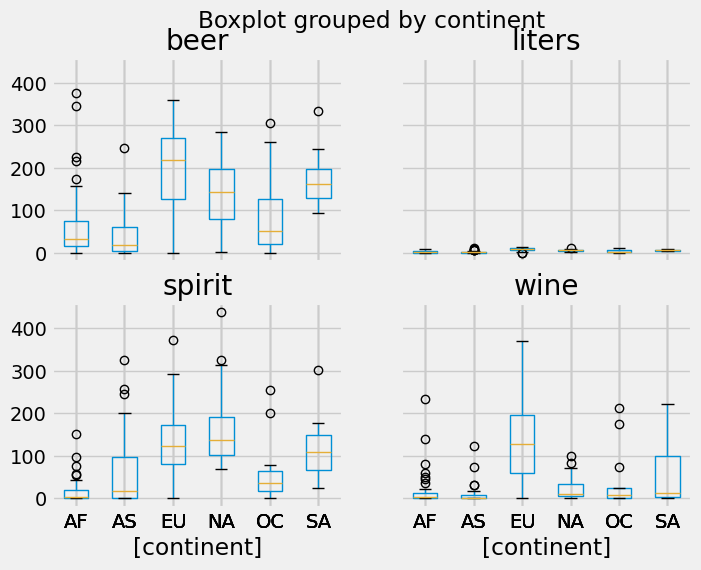

In [40]:
# Box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent');

## Scatter plots: Show the relatioship between two numerical variables

In [41]:
# Select the beer and wine columns and sort by beer.
drinks[['beer', 'wine']].sort_values('beer').values

array([[  0,   0],
       [  0,  74],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  1,   7],
       [  1,   1],
       [  1,   4],
       [  1,   1],
       [  2,   0],
       [  3,   1],
       [  5,   0],
       [  5,   0],
       [  5,  16],
       [  5,   1],
       [  5,   0],
       [  6,   1],
       [  6,   0],
       [  6,   1],
       [  6,   9],
       [  8,   0],
       [  8,   1],
       [  8,   1],
       [  9,   2],
       [  9,   0],
       [  9,   7],
       [  9,   0],
       [ 12,  10],
       [ 13,   0],
       [ 15,   3],
       [ 15,   1],
       [ 16,   5],
       [ 16,   0],
       [ 17,   1],
       [ 18,   0],
       [ 19,  32],
       [ 19,   2],
       [ 20,   0],
       [ 20,  31],
       [ 21,  11],
       [ 21,  11],
       [ 21,   5],
       [ 21,

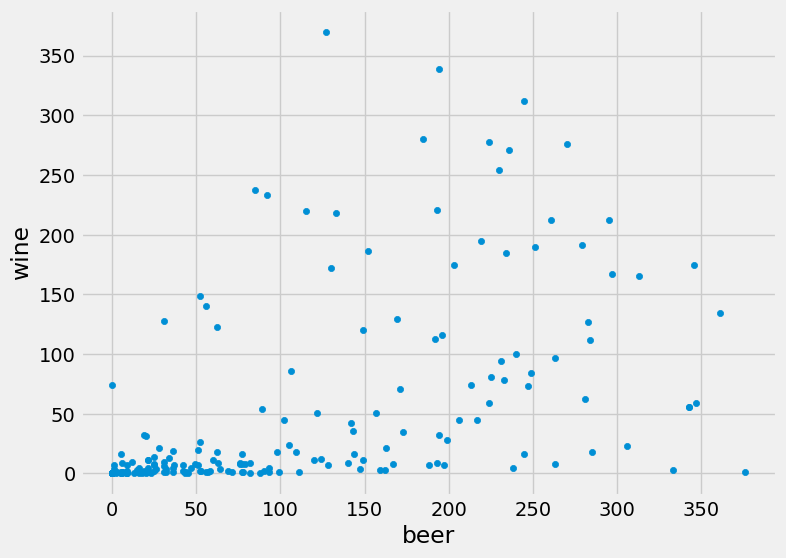

In [42]:
# Compare with scatter plot.
drinks.plot(kind='scatter', x='beer', y='wine');

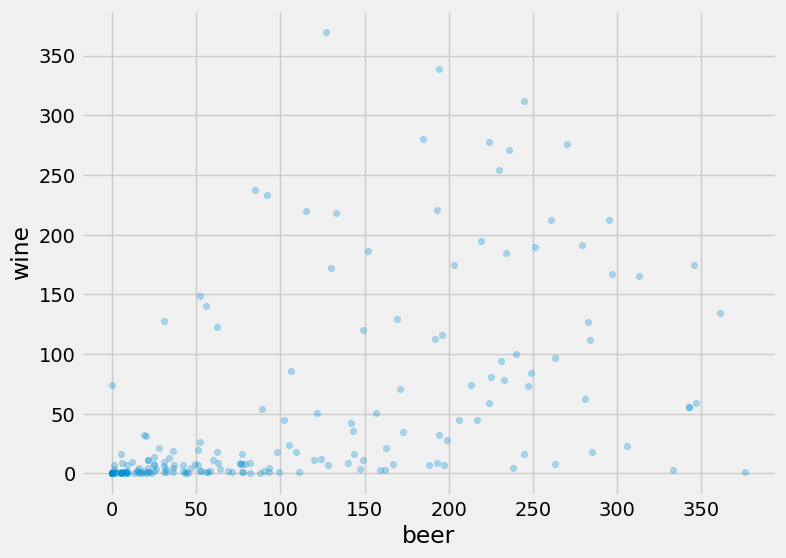

In [43]:
# Add transparency (great for plotting several graphs on top of each other, or for illustrating density!).
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3);

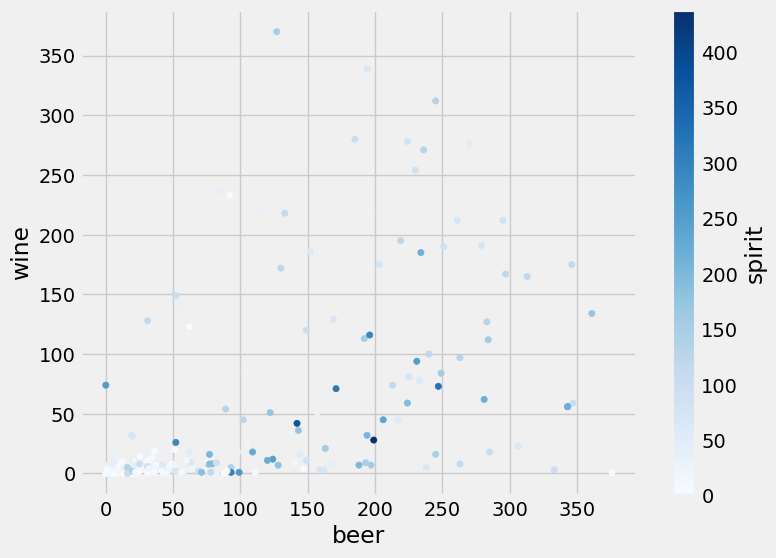

In [44]:
# Vary point color by spirit servings.
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues');

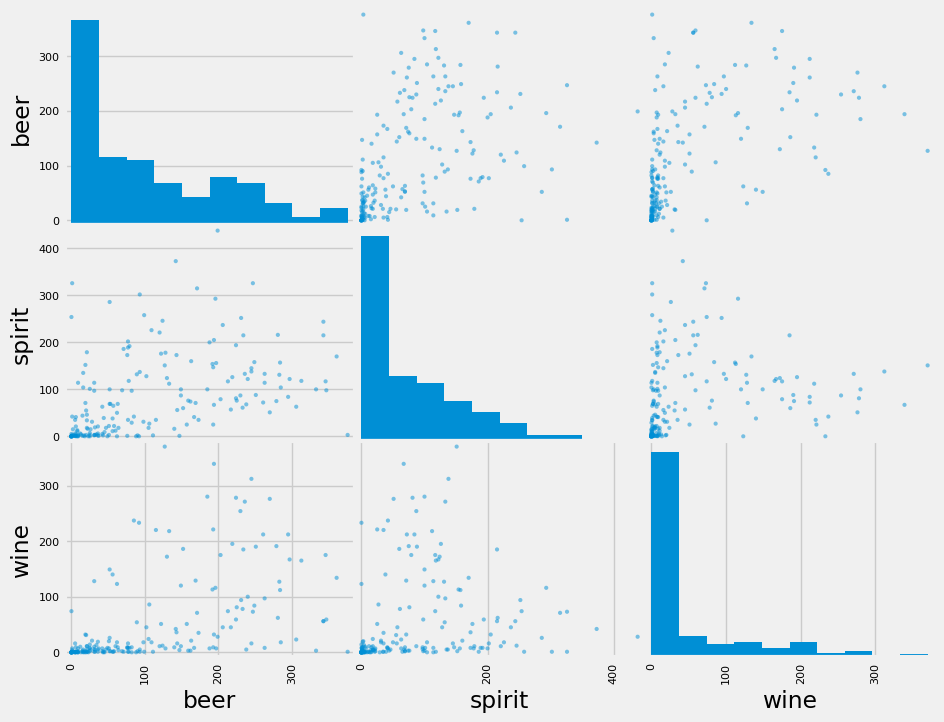

In [45]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8));

Plotting ```DataFrames```

<Axes: xlabel='col3', ylabel='col4'>

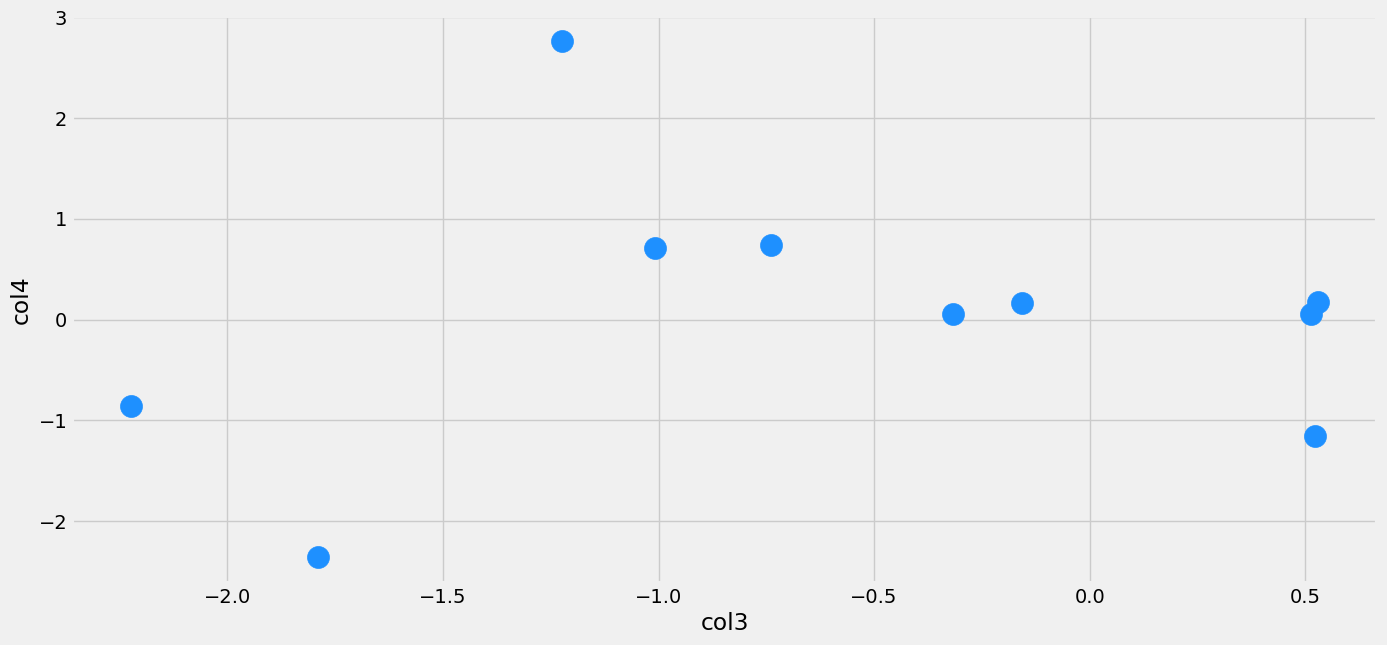

In [46]:
df.plot(x='col3', y='col4', kind='scatter', color='dodgerblue',figsize=(15,7), s=250)

How to view the association between the variables `ZN` and `INDUS` using a scatter plot

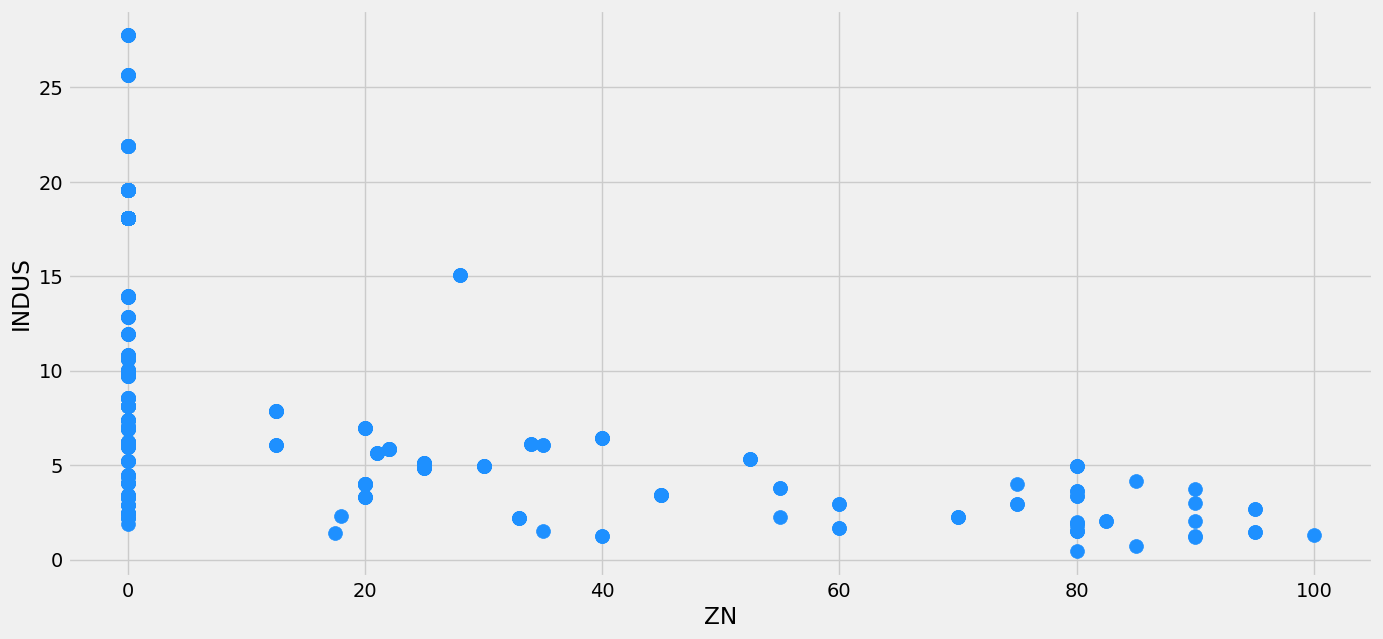

In [47]:
housing.plot(x='ZN', y='INDUS', kind='scatter',
           color='dodgerblue', figsize=(15,7), s=100);

How to use a list comprehension to change the size of the scatter plot dots based on `DIS`

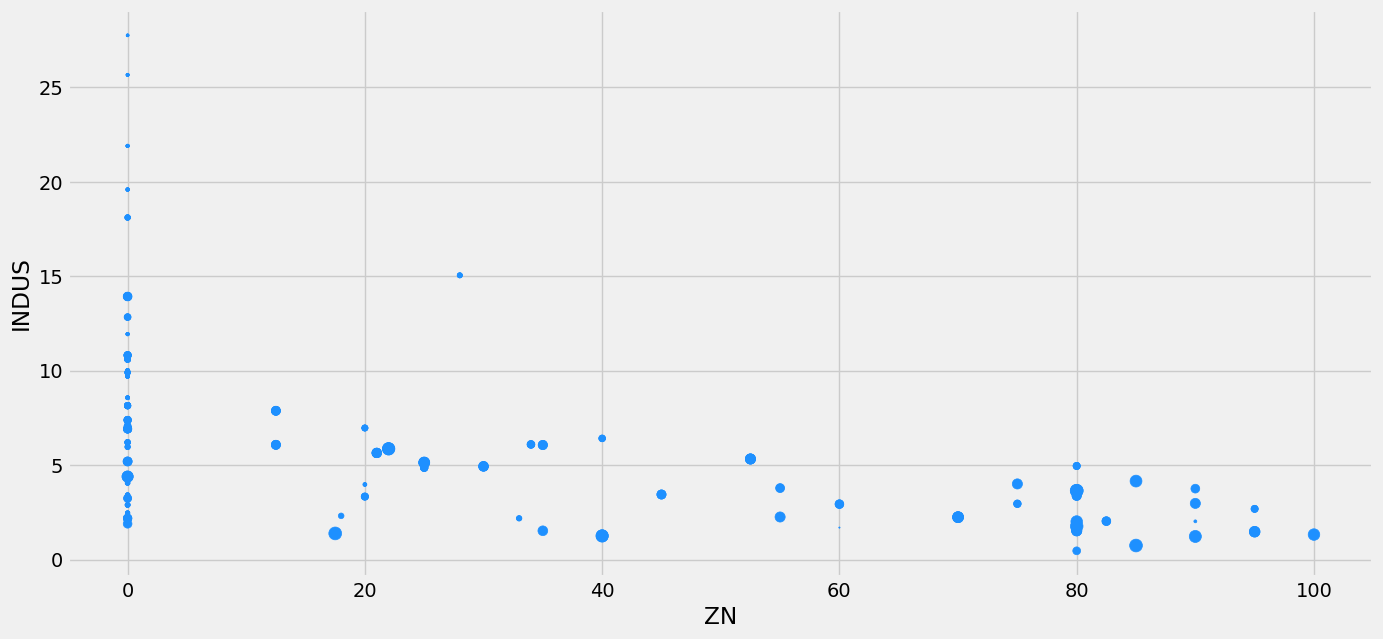

In [48]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
housing.plot(x='ZN', y='INDUS', kind='scatter',
           color='dodgerblue', figsize=(15,7), s=[x**2 for x in housing['DIS']]);

<a id="seaborn"></a>
## Seaborn `pairplot`

---


With the `DataFrame` object `housing`, we will render a pairplot using the Seaborn library.
What do each of the elements represent? Is this more or less useful than the previous plot?

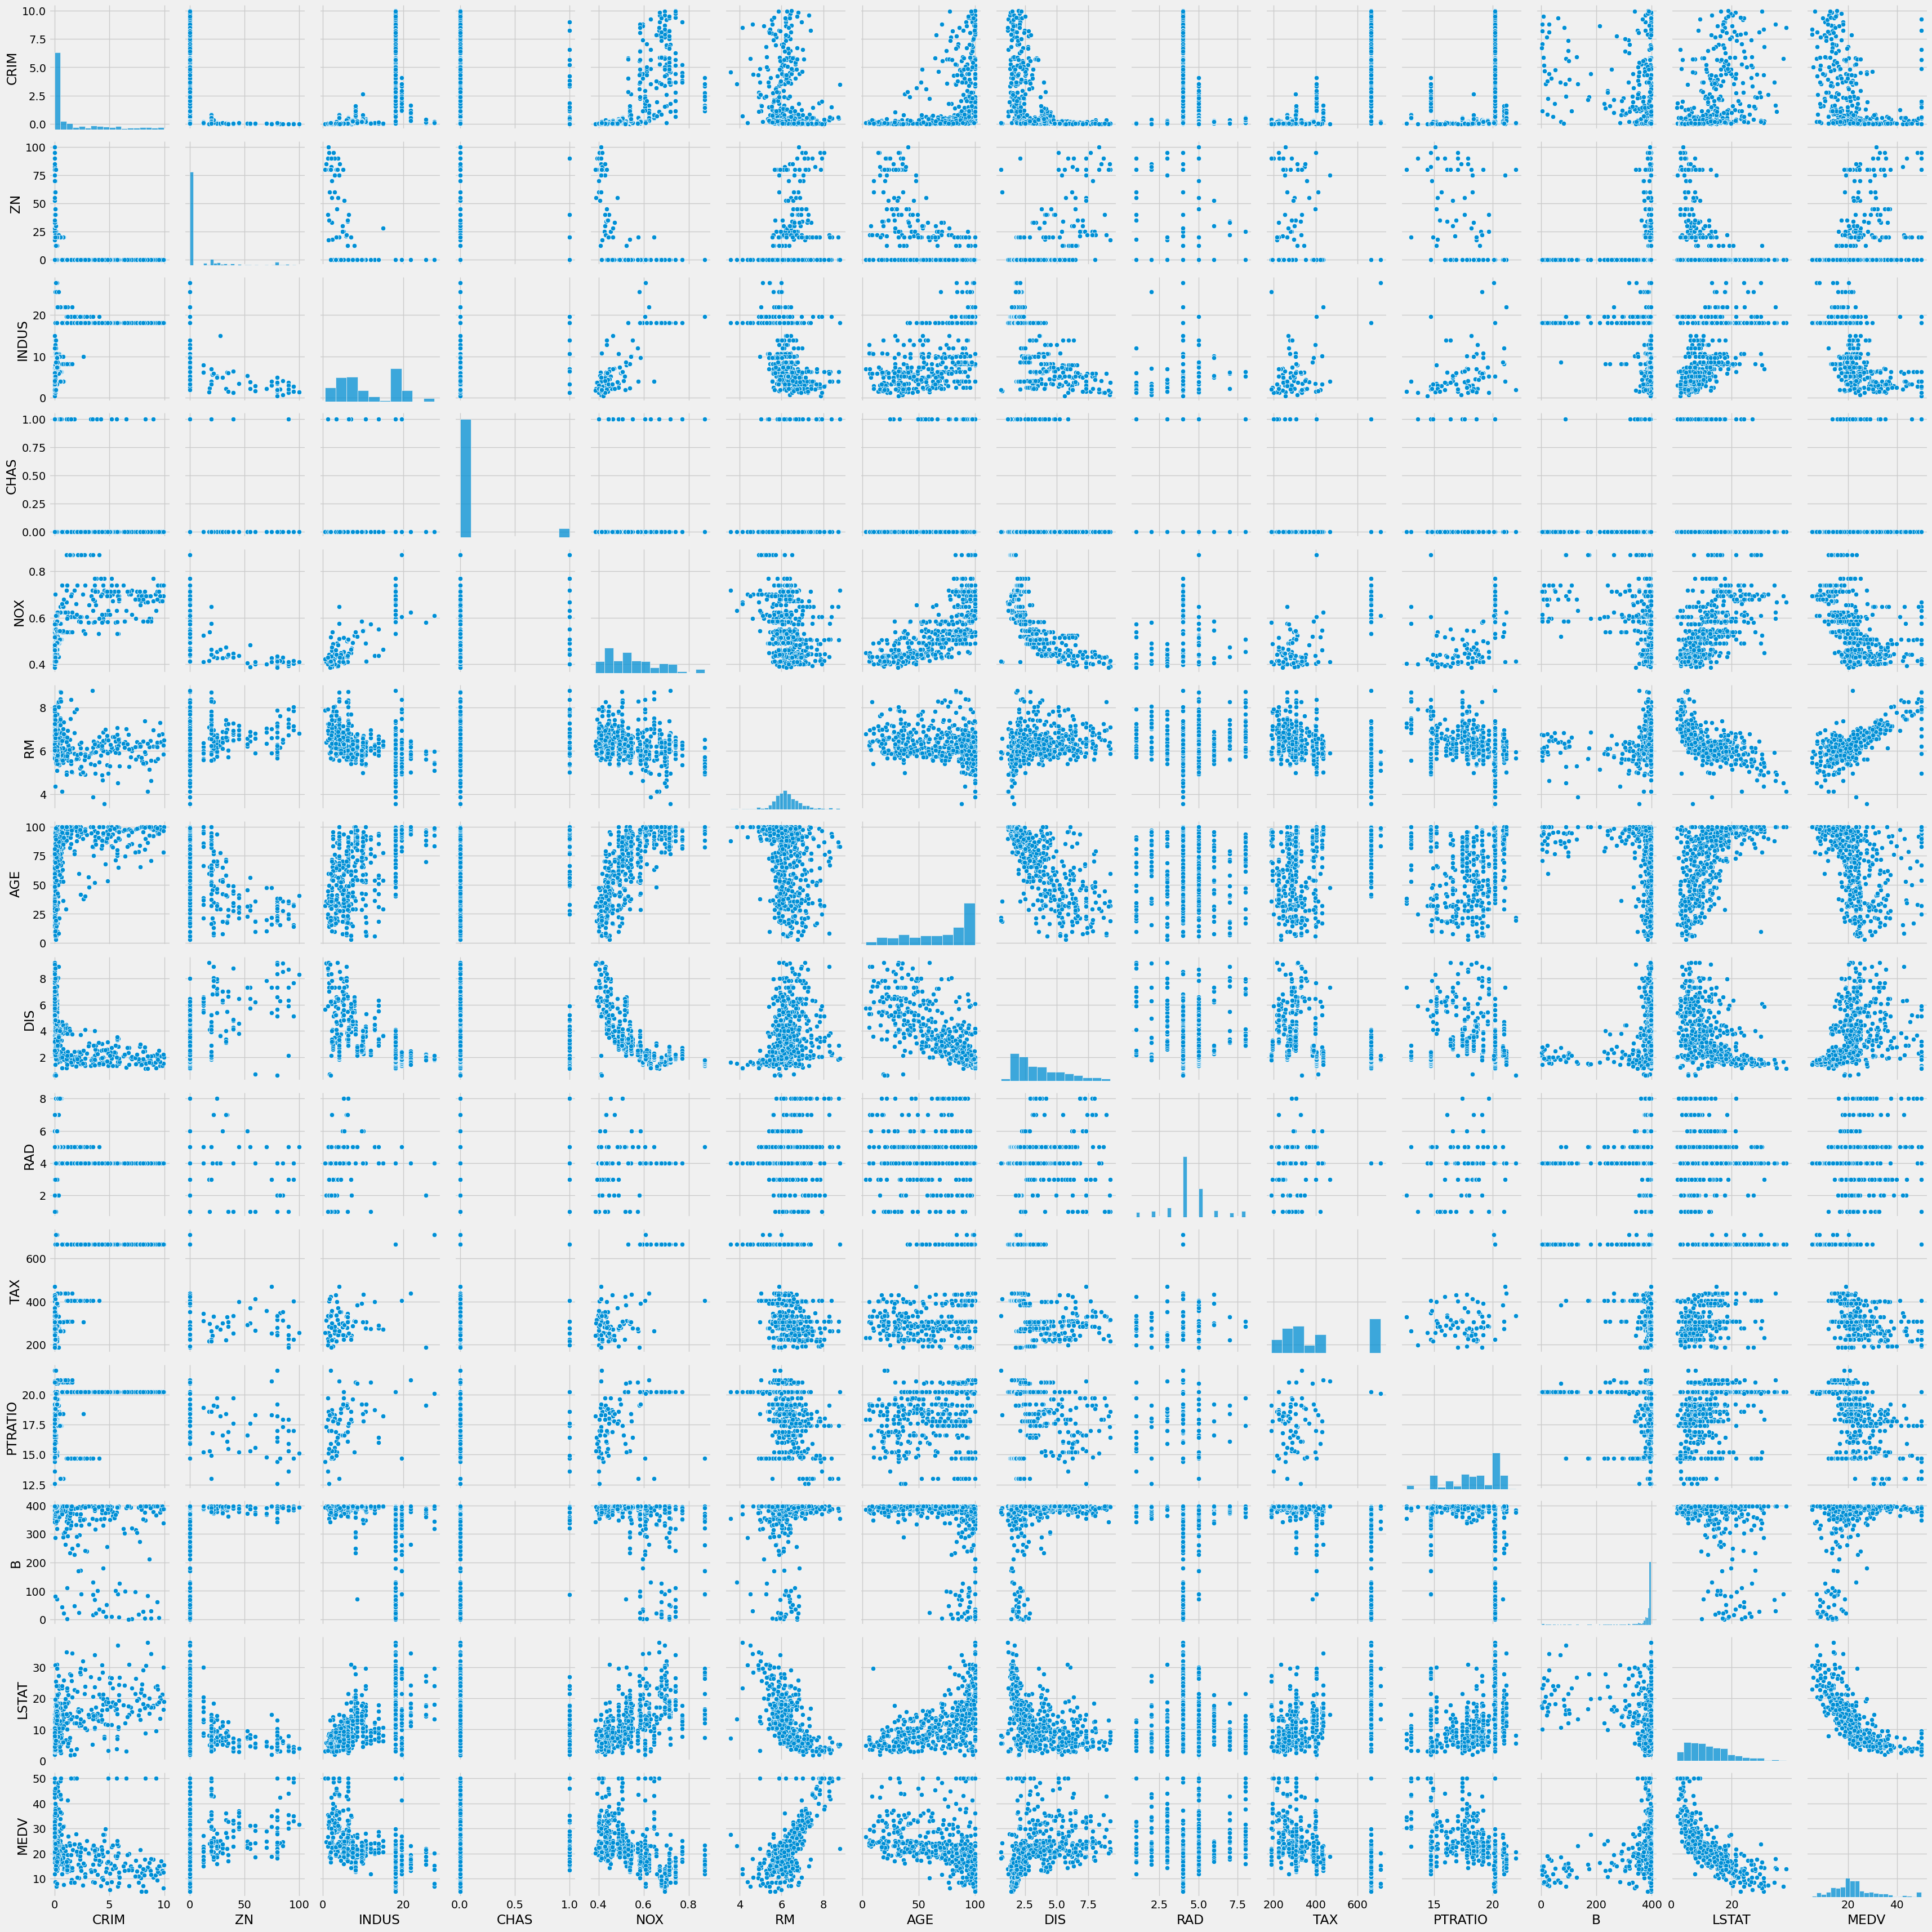

In [49]:
sns.pairplot(housing)

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

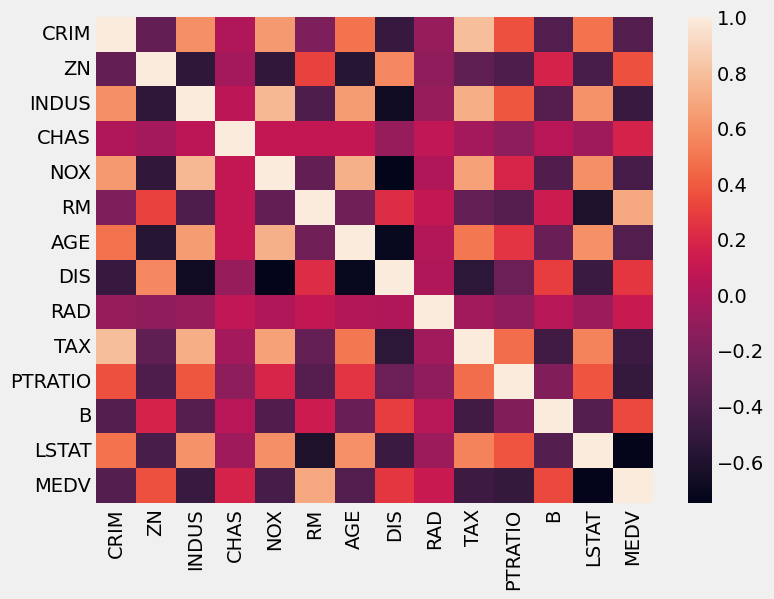

In [50]:
# Make a heatmap on the correlations between variables in the housing data:
housing_correlations = housing.corr();
sns.heatmap(housing_correlations);

Practice Problem

Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

Practice Problem

Now, create a scatter plot of two heatmap entries that appear to have negative correlation.

## Optional section Understanding Matplotlib

---

- Matplotlib uses a blank canvas called a figure
- Within this canvas, we can obtain smaller objects called axes
- Pandas allows us to plot to a specified axes if we pass the object to the ax parameter


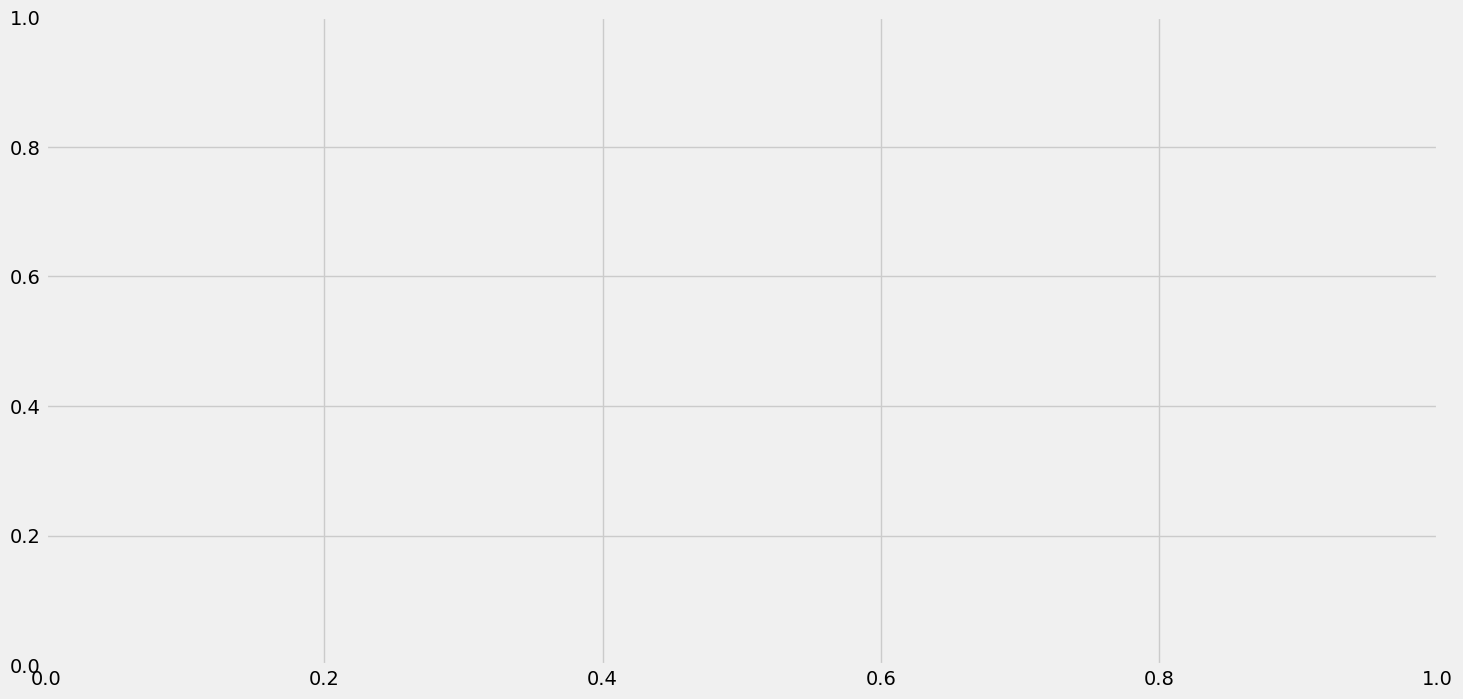

In [51]:
fig = plt.subplots(1,1, figsize=(16,8));

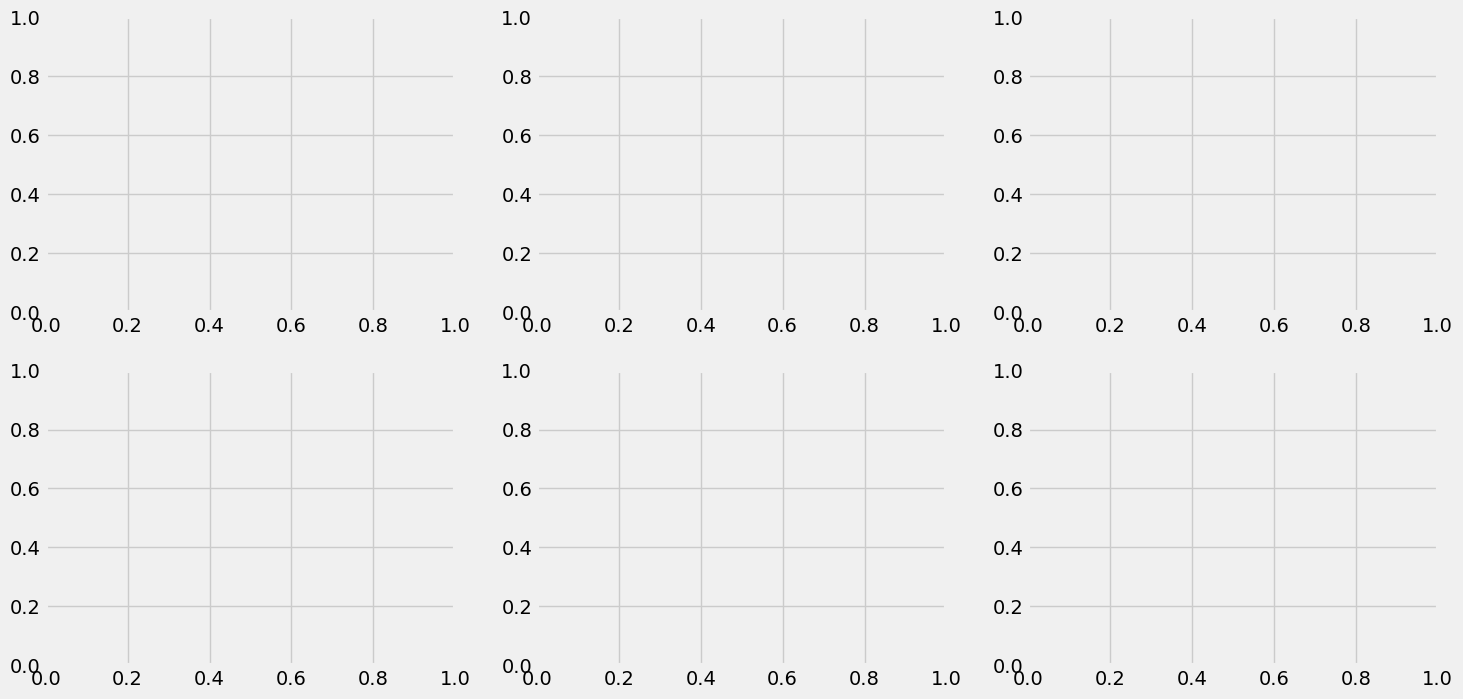

In [52]:
fig, axes = plt.subplots(2,3, figsize=(16,8));

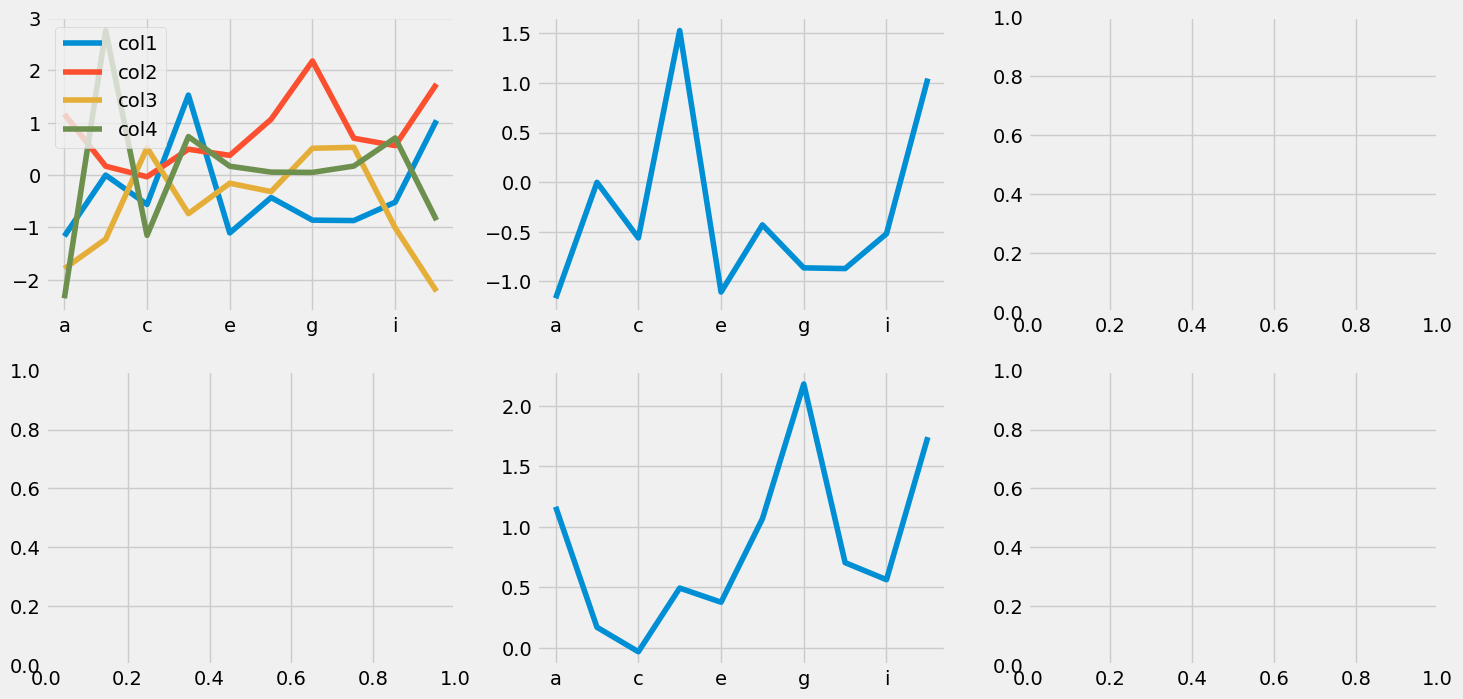

In [53]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
df.plot(ax=axes[0][0]);
df['col1'].plot(ax=axes[0][1]);
df['col2'].plot(ax=axes[1][1]);

Using a bit more customization

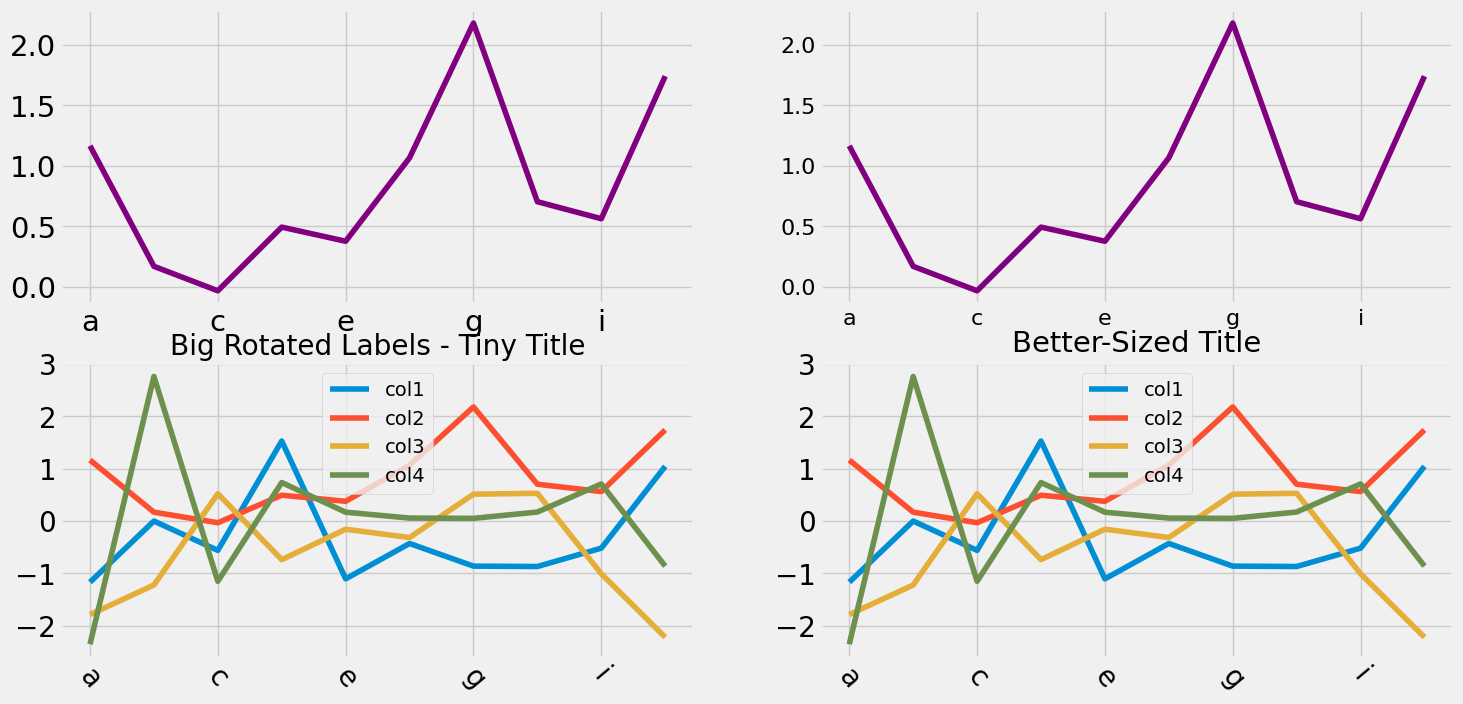

In [54]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# We can change the ticks' size.
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0])\

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(16,8), fontsize=20, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01);

##Saving a plot to a file

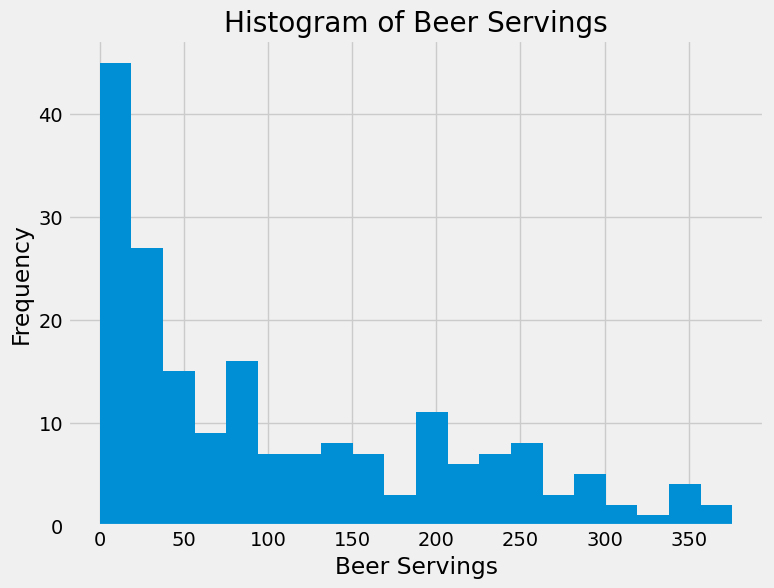

In [55]:
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png');    # Save to file!

## Thank You!

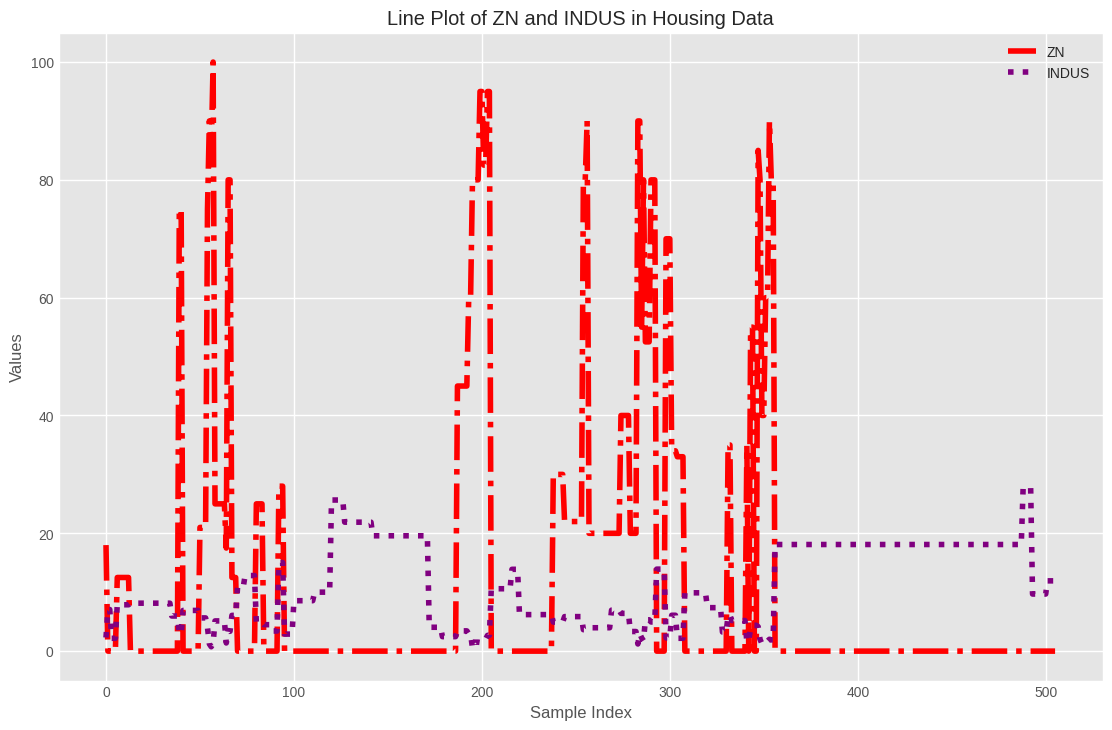

In [60]:
plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
plt.plot(housing['ZN'], label='ZN', color='red', linestyle='-.')
plt.plot(housing['INDUS'], label='INDUS', color='purple', linestyle=':')

plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Line Plot of ZN and INDUS in Housing Data')

plt.legend()

plt.show()

<ipython-input-61-7d741e156163>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


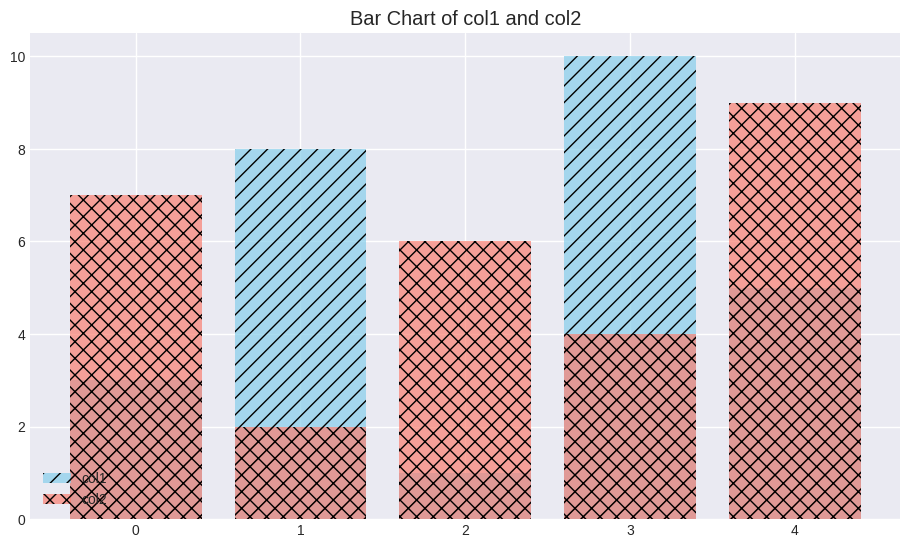

In [61]:
data = {
    'col1': [3, 8, 1, 10, 5],
    'col2': [7, 2, 6, 4, 9]
}

dummy_data = pd.DataFrame(data)

plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 6))

plt.bar(dummy_data.index, dummy_data['col1'], label='col1', color='skyblue', alpha=0.7, hatch='//')
plt.bar(dummy_data.index, dummy_data['col2'], label='col2', color='salmon', alpha=0.7, hatch='xx')

plt.title('Bar Chart of col1 and col2')

plt.legend(loc='lower left')

plt.show()



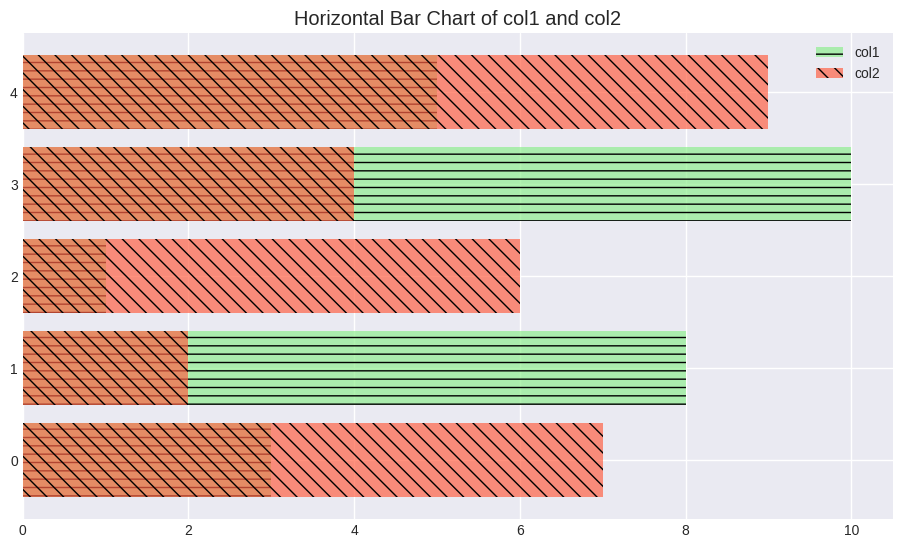

In [63]:
plt.figure(figsize=(10, 6))

plt.barh(dummy_data.index, dummy_data['col1'], label='col1', color='lightgreen', alpha=0.7, hatch='--')
plt.barh(dummy_data.index, dummy_data['col2'], label='col2', color='tomato', alpha=0.7, hatch='\\\\')

plt.title('Horizontal Bar Chart of col1 and col2')

plt.legend(loc='upper right')

plt.show()

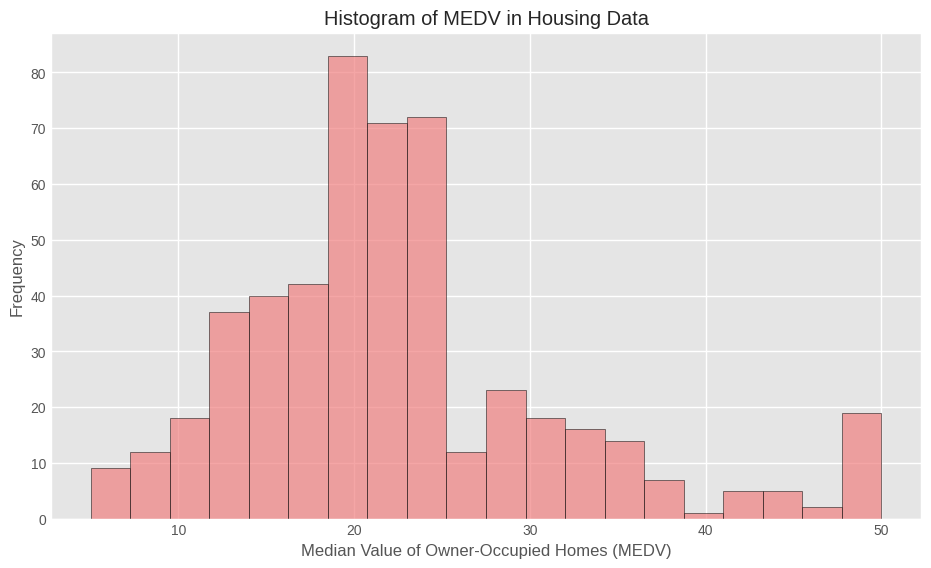

In [66]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
housing['MEDV'].plot(kind='hist', bins=20, edgecolor='black', color='lightcoral', alpha=0.7)

plt.xlabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Frequency')
plt.title('Histogram of MEDV in Housing Data')

plt.show()

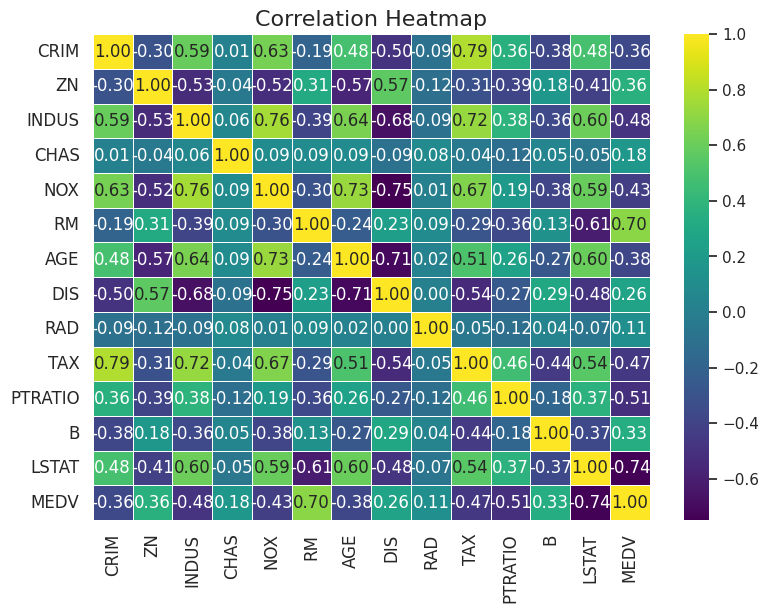

In [73]:

plt.figure(figsize=(8, 6))
sns.heatmap(housing_correlations, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()








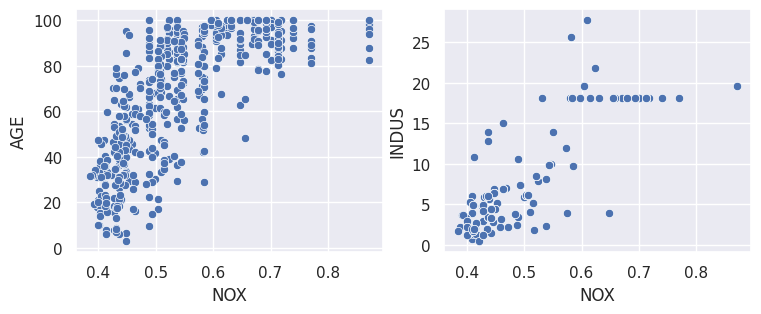

In [90]:
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.scatterplot(data=housing, x="NOX", y="AGE");

plt.subplot(1,3,2)
sns.scatterplot(data=housing, x="NOX", y="INDUS");

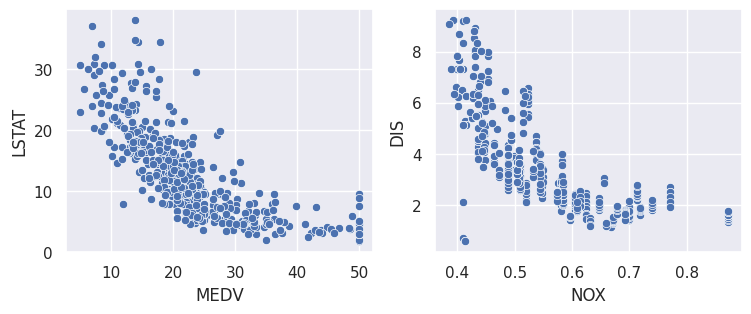

In [91]:
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.scatterplot(data=housing, x="MEDV", y="LSTAT");

plt.subplot(1,3,2)
sns.scatterplot(data=housing, x="NOX", y="DIS");